In [1]:
import pandas as pd
import os
import re
import datetime
import matplotlib
from matplotlib import pyplot as plt

%pylab inline

pd.options.display.max_rows = 4000

os.chdir("C:/Users/YJ/Documents/1) Learning/Udacity - Machine Learning/capstone/Submission")

data = pd.read_hdf("DJUSTC Prices and Ratios.h5","Output")
data.index = data.date
data=data.drop("date",axis=1)

Populating the interactive namespace from numpy and matplotlib


In [2]:
pivot= data.pivot_table(index=data.index,columns=data.ticker)
pivot.columns.names = ['data_types','tickers']

In [3]:
print('The size of the pivoted dataframe is', pivot.shape)
print('The range of the index is from ',pivot.index[0]," to ",pivot.index[-1])
print('The columns consist of ',len(pivot.columns.names),' levels which is ',pivot.columns.names)
print('There are ',len(pivot.columns.get_level_values('data_types').unique())," different data types for each of the ", 
     len(pivot.columns.get_level_values('tickers').unique()), " unique tickers.")

The size of the pivoted dataframe is (1500, 2846)
The range of the index is from  2012-07-13 00:00:00  to  2018-06-28 00:00:00
The columns consist of  2  levels which is  ['data_types', 'tickers']
There are  23  different data types for each of the  131  unique tickers.


In [4]:
print('A quick glimpse of the data')
pivot.head()

A quick glimpse of the data


data_types Book_Value_Per_Share_*_USD                                          \
tickers                          AABA   AAPL  ACIW   ADBE    ADI  ADSK   AKAM   
date                                                                            
2012-07-13                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-16                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-17                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-18                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   
2012-07-19                      13.06  16.99  4.52  13.49  13.94  8.34  13.19   

data_types                     ...         volume                     \
tickers     AMAT   AMD ANET    ...           VRSN      VSAT VSM WDAY   
date                           ...                                     
2012-07-13  6.04  0.75  NaN    ...       784800.0  238200.0 NaN  NaN   
2012-07-16  6.04  0.75  NaN    ...      1332800.0  151600.0 NaN  NaN   
2012-07-17  6.04  0.75  NaN    ...      1263700.0  191800.0 NaN  NaN   
2012-07-18  6.04  0.75  NaN    ...      1786200.0  304900.0 NaN  NaN   
2012-07-19  6.04  0.75  NaN    ...      1669900.0  197000.0 NaN  NaN   

data_types                                                
tickers           WDC  WP       XLNX   Z ZAYO         ZG  
date                                                      
2012-07-13  2596000.0 NaN  2577100.0 NaN  NaN   534400.0  
2012-07-16  1989900.0 NaN  4160300.0 NaN  NaN   602900.0  
2012-07-17  4140400.0 NaN  6270200.0 NaN  NaN   803800.0  
2012-07-18  6545700.0 NaN  5546400.0 NaN  NaN  1296600.0  
2012-07-19  4549800.0 NaN  8132000.0 NaN  NaN   862500.0  

[5 rows x 2846 columns]

In [5]:
total = pivot.isnull().sum().sort_values(ascending = False)
percent = (pivot.isnull().sum()/pivot.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total    Percent
data_types                  tickers                  
Operating_Cash_Flow_USD_Mil WP        1384  92.266667
close                       WP        1384  92.266667
dividend_amount             WP        1384  92.266667
Revenue_USD_Mil             WP        1384  92.266667
Operating_Margin_%          WP        1384  92.266667
split_coefficient           WP        1384  92.266667
Earnings_Per_Share_USD      WP        1384  92.266667
Gross_Margin_%              WP        1384  92.266667
open                        WP        1384  92.266667
Shares_Mil                  WP        1384  92.266667
high                        WP        1384  92.266667
Book_Value_Per_Share_*_USD  WP        1384  92.266667
Net_Income_USD_Mil          WP        1384  92.266667
adjusted_close              WP        1384  92.266667
Operating_Income_USD_Mil    WP        1384  92.266667
Cap_Spending_USD_Mil        WP        1384  92.266667
volume                      WP        1384  92.266667
Free_Cash_Flow_USD_Mil      WP        1384  92.266667
low                         WP        1384  92.266667
Net_Income_USD_Mil          DVMT      1376  91.733333

In [6]:
print("We have ",len(pivot.columns.names)," levels in columns")
print("The levels are ",pivot.columns.names)
for level in pivot.columns.names:
    print("\n There are ",len(pivot.columns.get_level_values(level).unique()), " unique values in ", level)
    print("\n ",level, " has the following unique values: \n", pivot.columns.get_level_values(level).unique())

print("**************************************************************************************")
    
print("We have ",len(pivot.index.names)," level in index")
print("The levels are ",pivot.index.names)
for level in pivot.index.names:
    print("\n There are ",len(pivot.index.get_level_values(level).unique()), " unique values in ", level)
    print("\n ",level, " has the following unique values: \n", pivot.index.get_level_values(level).unique())


We have  2  levels in columns
The levels are  ['data_types', 'tickers']

 There are  23  unique values in  data_types

  data_types  has the following unique values: 
 Index(['Book_Value_Per_Share_*_USD', 'Cap_Spending_USD_Mil', 'Dividends_USD',
       'Earnings_Per_Share_USD', 'Free_Cash_Flow_Per_Share_*_USD',
       'Free_Cash_Flow_USD_Mil', 'Gross_Margin_%', 'Net_Income_USD_Mil',
       'Operating_Cash_Flow_USD_Mil', 'Operating_Income_USD_Mil',
       'Operating_Margin_%', 'Payout_Ratio_%_*', 'Revenue_USD_Mil',
       'Shares_Mil', 'Working_Capital_USD_Mil', 'adjusted_close', 'close',
       'dividend_amount', 'high', 'low', 'open', 'split_coefficient',
       'volume'],
      dtype='object', name='data_types')

 There are  131  unique values in  tickers

  tickers  has the following unique values: 
 Index(['AABA', 'AAPL', 'ACIW', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET',
       ...
       'VRSN', 'VSAT', 'VSM', 'WDAY', 'WDC', 'WP', 'XLNX', 'Z', 'ZAYO', 'ZG'],
   

Plotting the effect of a share split on opening prices:


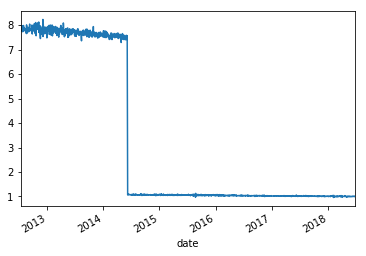

In [8]:
print("Plotting the effect of a share split on opening prices:")
(pivot.xs('open',axis=1,level=0).xs("AAPL",axis=1)/pivot.xs('adjusted_close',axis=1,level=0).xs("AAPL",axis=1)).plot()

In [9]:
print("Below we see all the stock splits for all the shares for our data set:")
stock_splits = pivot.xs('split_coefficient',axis=1).stack().sort_values(ascending=False)
stock_splits = stock_splits[stock_splits!=1].swaplevel()
print(stock_splits)

Below we see all the stock splits for all the shares for our data set:
tickers  date      
AAPL     2014-06-09    7.0000
CRM      2013-04-18    4.0000
MANH     2014-01-13    4.0000
ACIW     2014-07-11    3.0000
MDSO     2013-12-17    2.0000
CERN     2013-07-01    2.0000
CTSH     2014-03-10    2.0000
SSNC     2016-06-27    2.0000
DDD      2013-02-25    1.5000
HPE      2017-04-03    1.3348
CTXS     2017-02-01    1.2558
DXC      2018-06-01    1.1560
LDOS     2013-09-30    0.2500
dtype: float64


In [10]:
adjusted_pivot=pivot.copy()

indices_to_adjust=['high', 'low', 'open', 'volume']
for index in indices_to_adjust:
    for ticker,date in stock_splits.index:
        adjust_slice = adjusted_pivot.xs(index,axis=1).xs(ticker,axis=1) 
        adjust_slice = adjust_slice[adjust_slice.index<date] / stock_splits[(ticker,date)]
        adjust_slice.name = (index,ticker)
        adjusted_pivot.update(adjust_slice)  

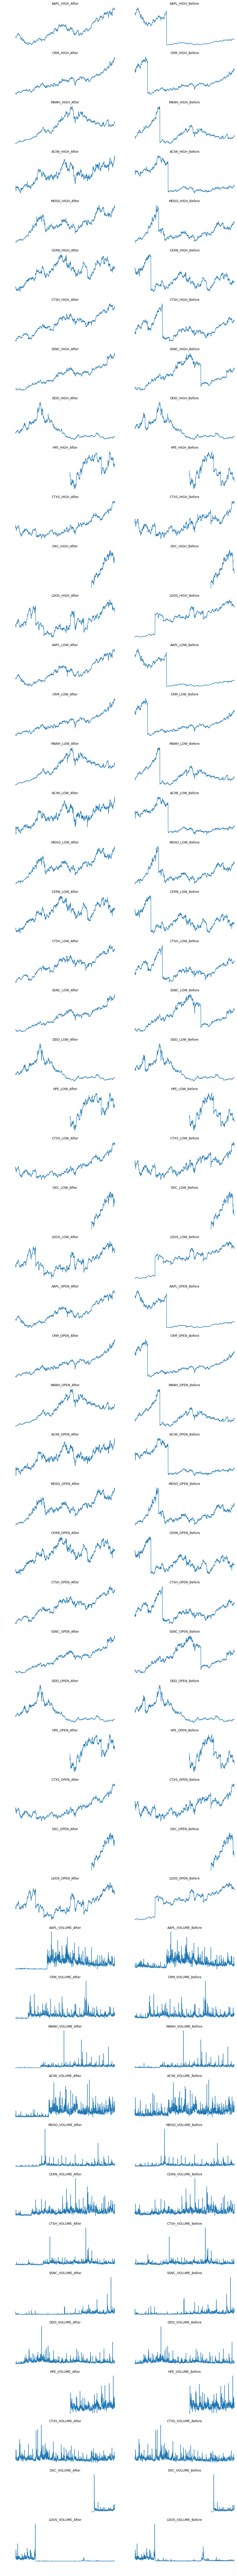

In [11]:
changes_made= len(stock_splits.index.get_level_values("tickers").unique())*len(indices_to_adjust)

fig, axes = plt.subplots(nrows=changes_made, ncols=2,figsize=(15,200))
plot_number=0
for index in indices_to_adjust:
    for ticker in stock_splits.index.get_level_values("tickers").unique():
        (adjusted_pivot.xs(index, axis=1, level=0).xs(ticker, axis=1)).plot(ax=axes[plot_number,0],
                                                                        title = ticker + "_" + index.upper() + "_After").axis('off')
        (pivot.xs(index, axis=1, level=0).xs(ticker, axis=1)).plot(ax=axes[plot_number,1],
                                                                title = ticker + "_" + index.upper() + "_Before").axis('off')
        plot_number+=1
        

In [ ]:
print("We can see that after adjusting the various measures for stock split, the graphs look a lot smoother ")

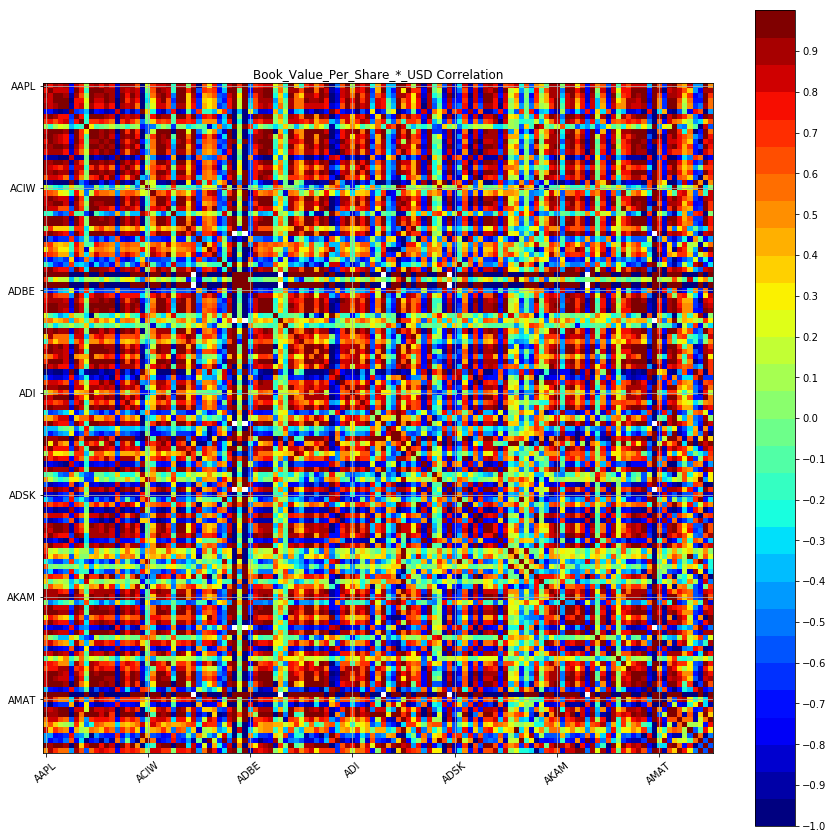

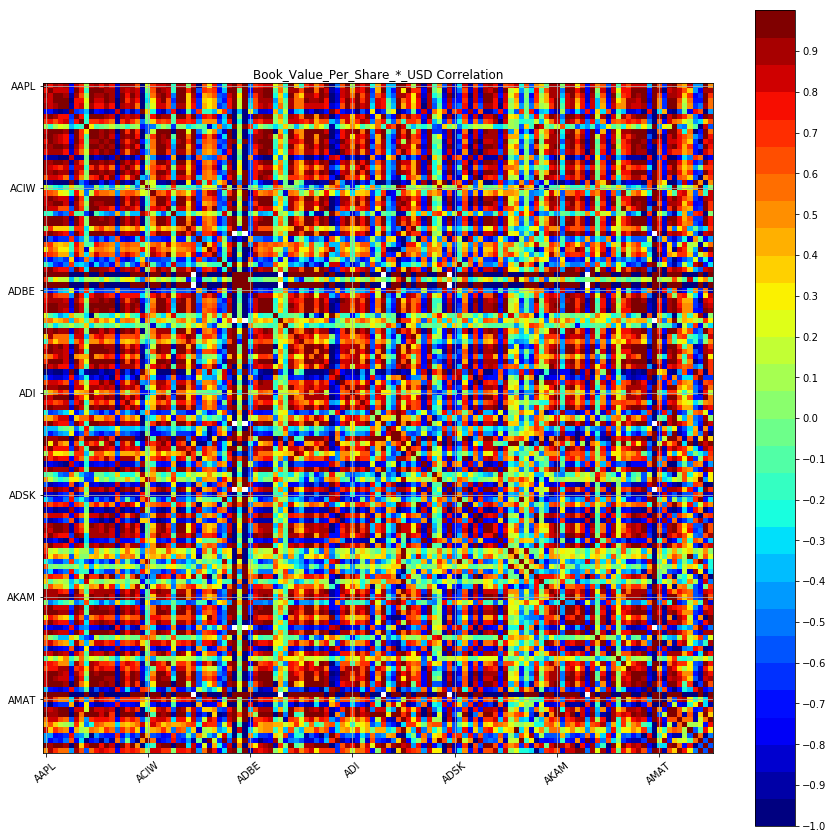

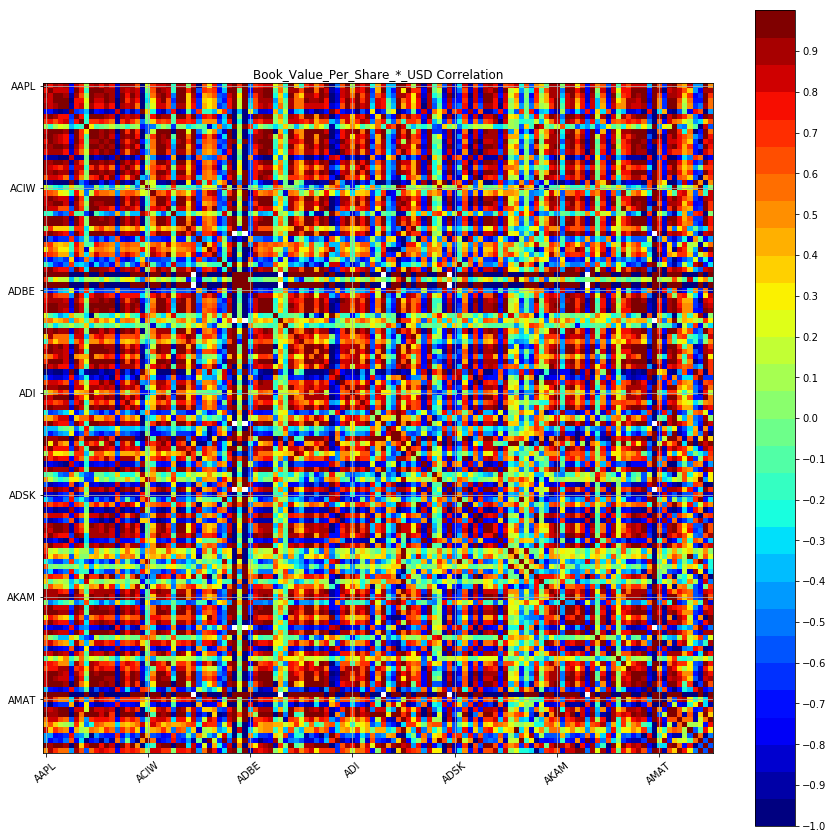

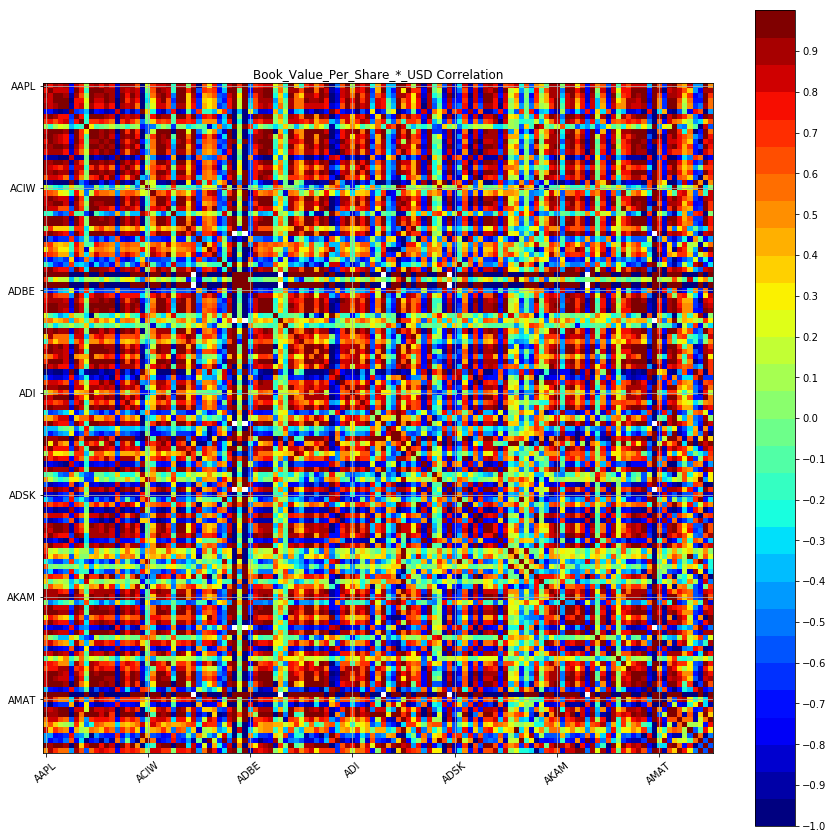

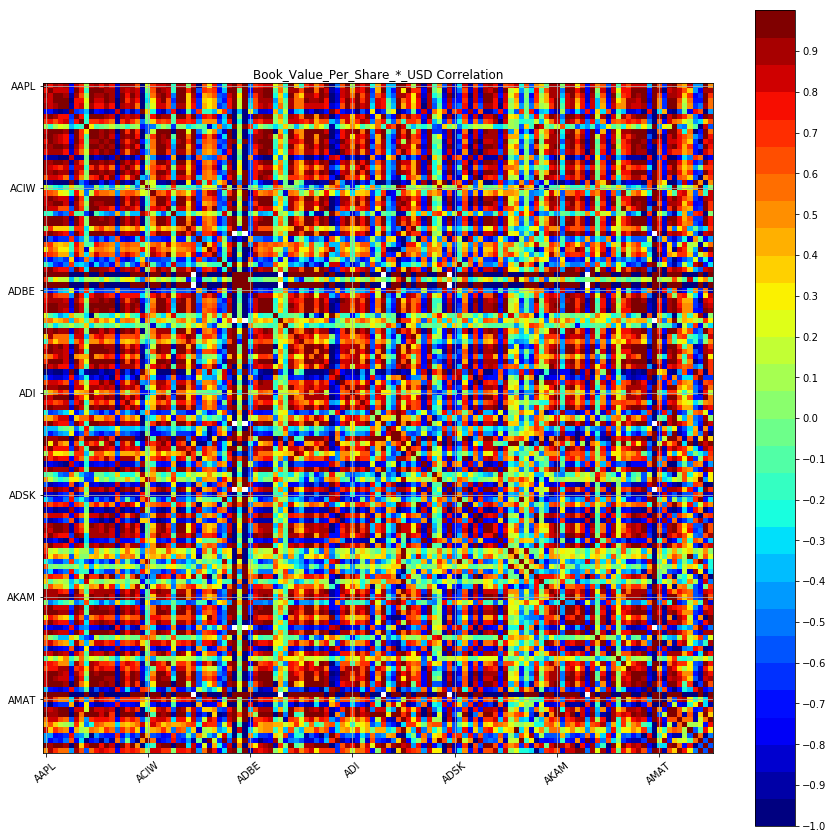

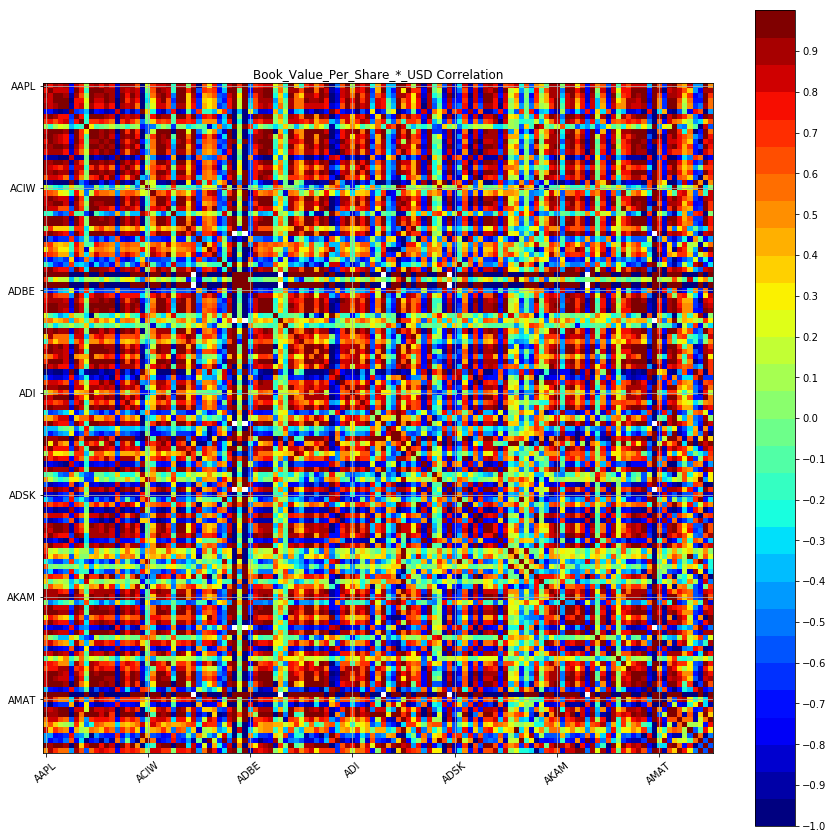

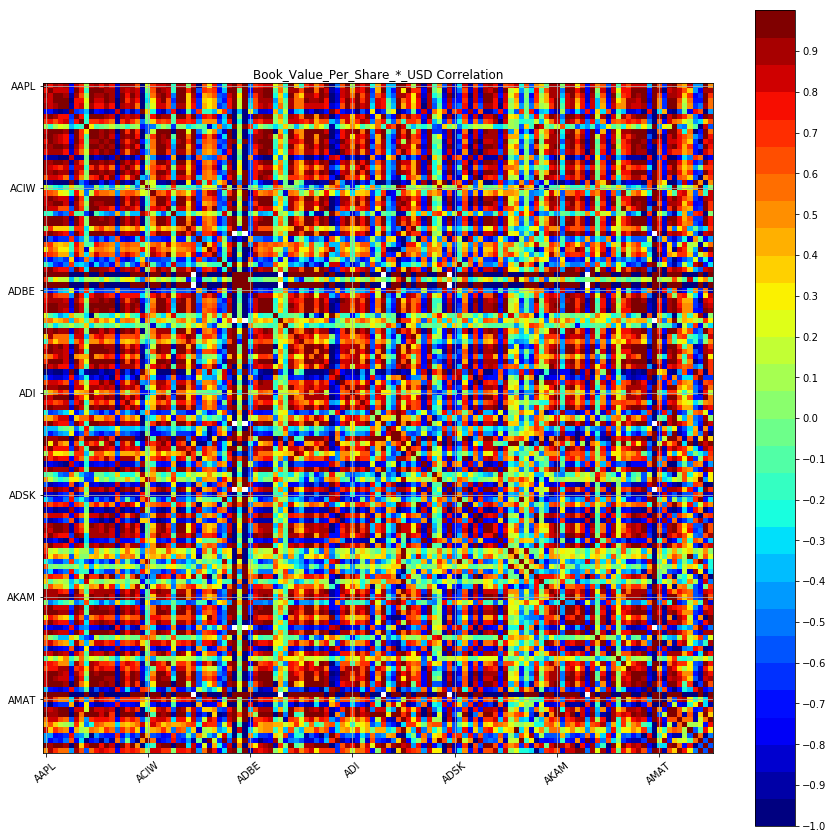

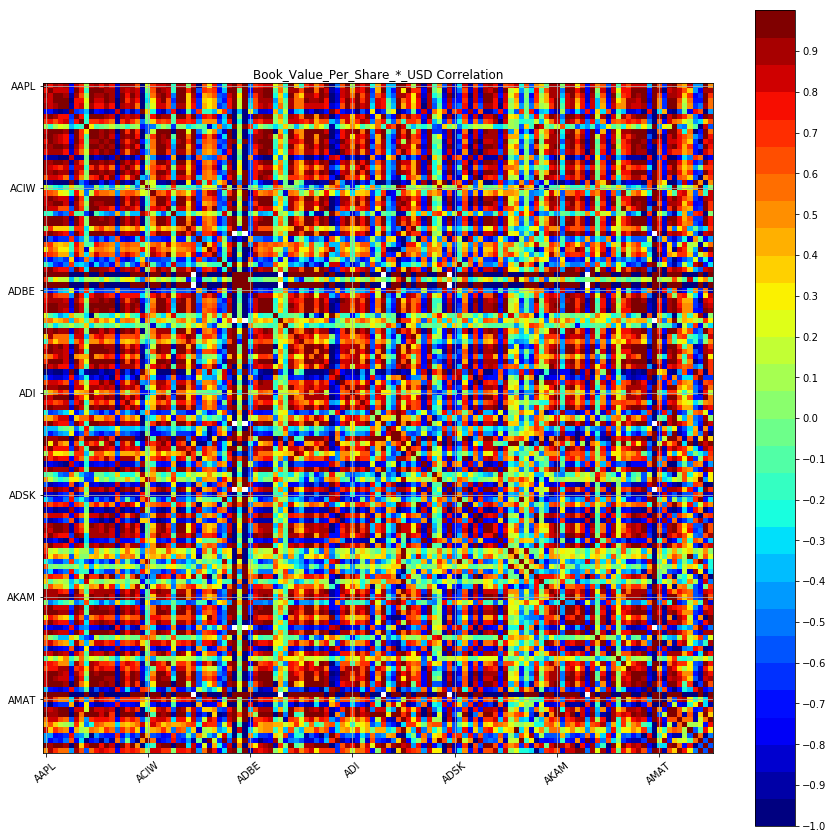

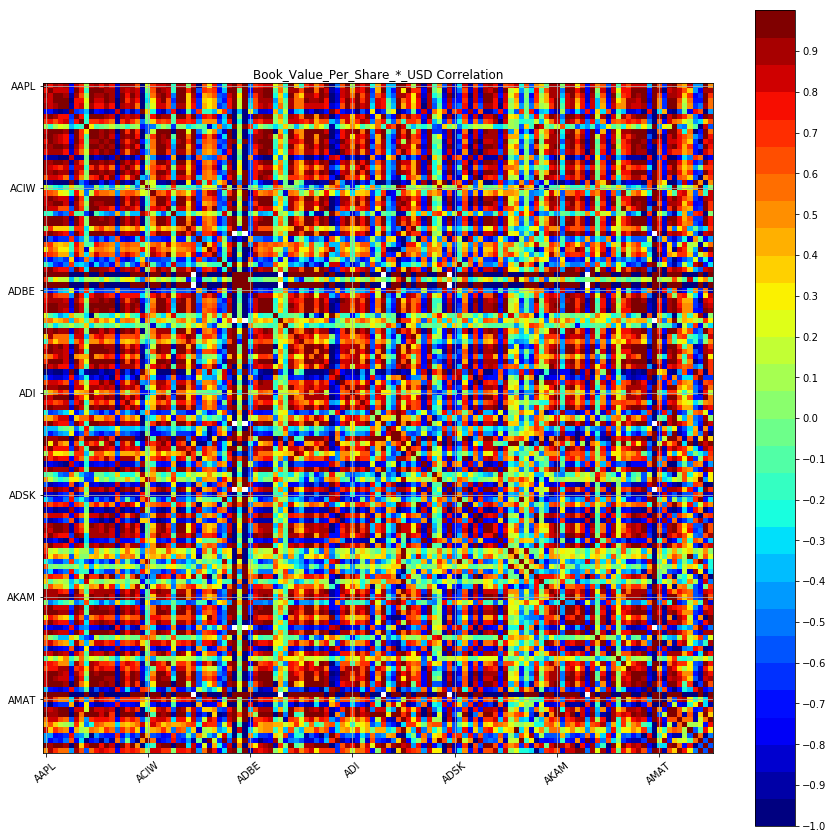

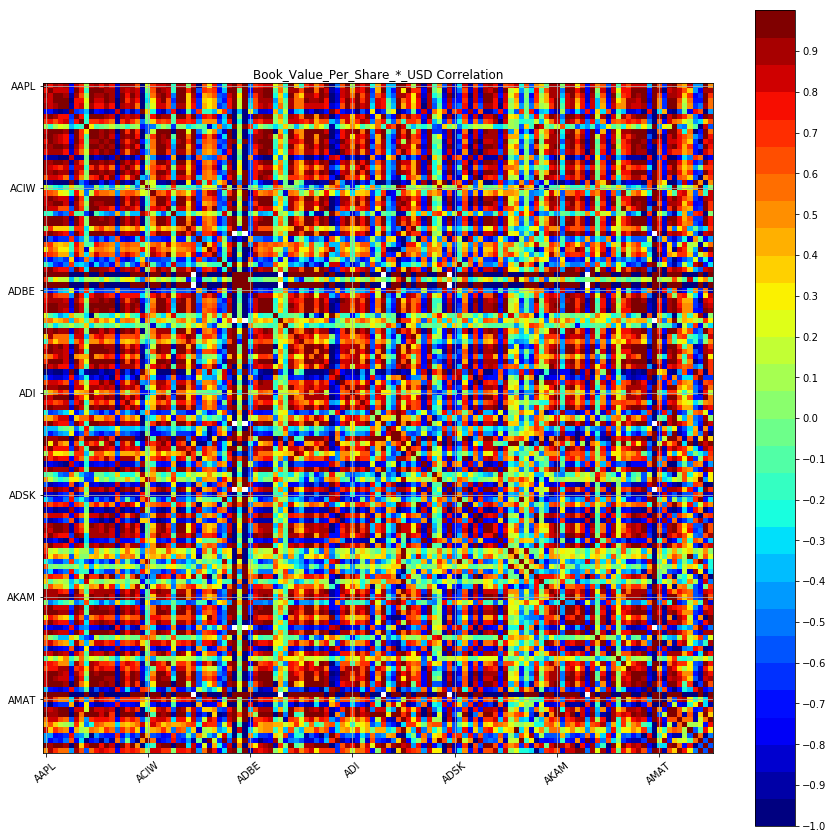

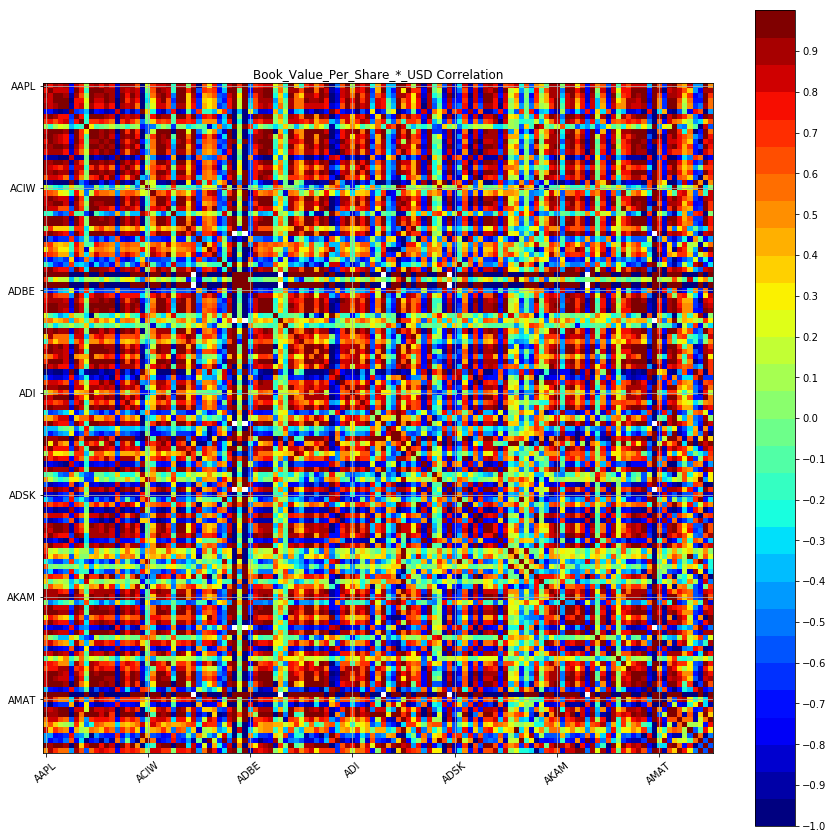

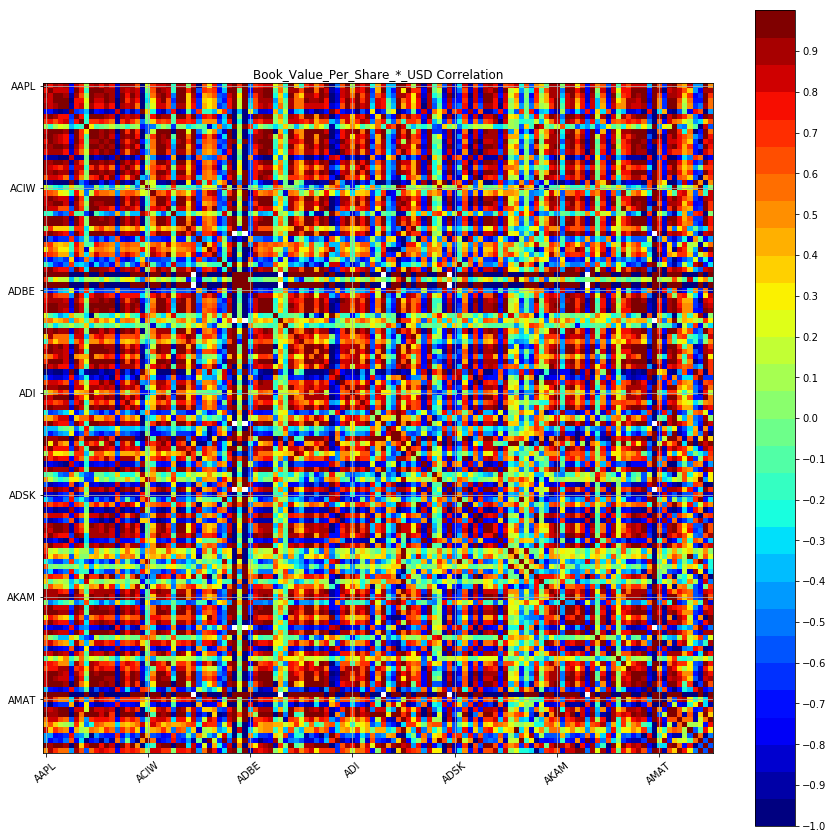

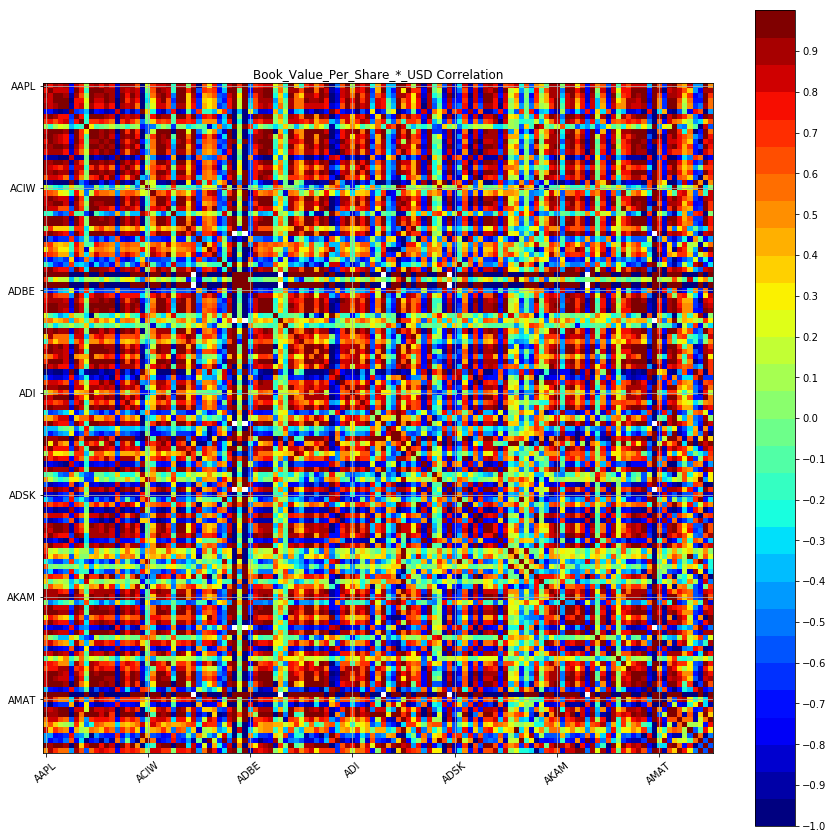

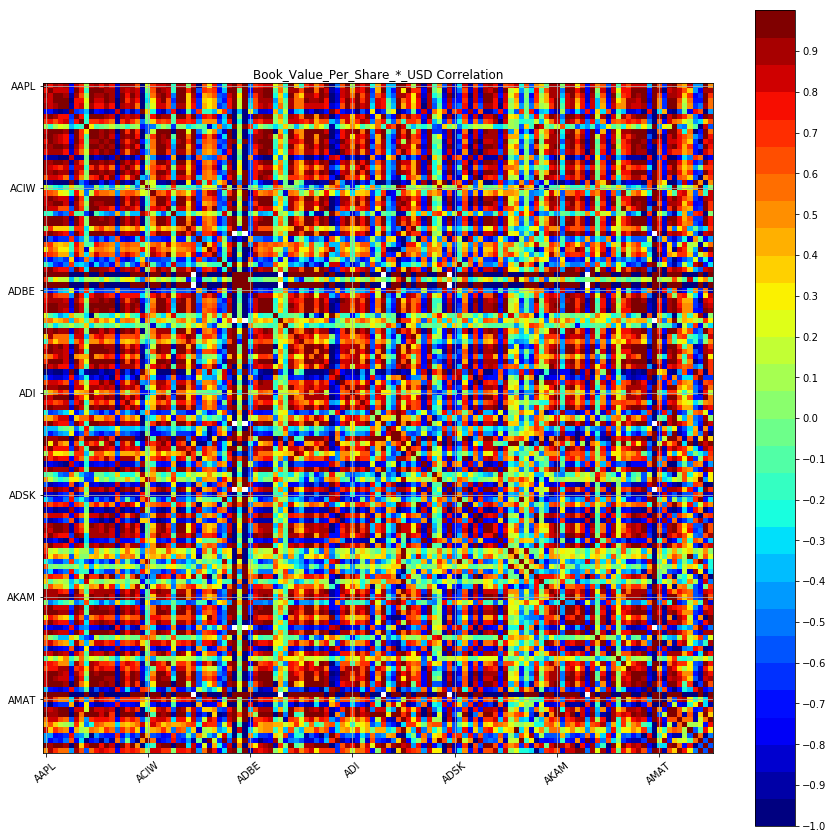

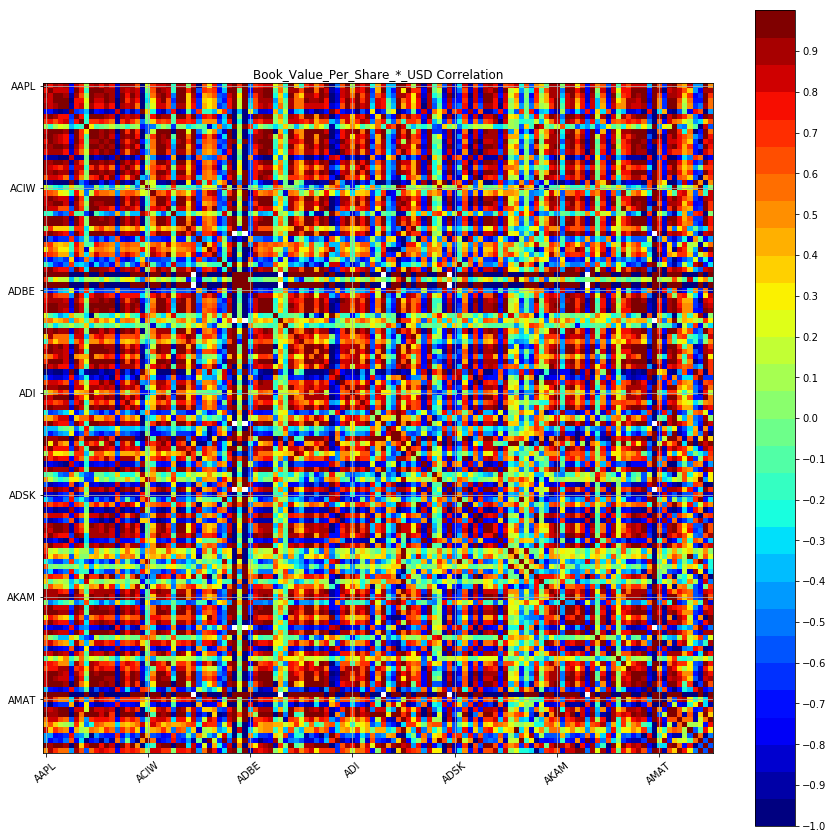

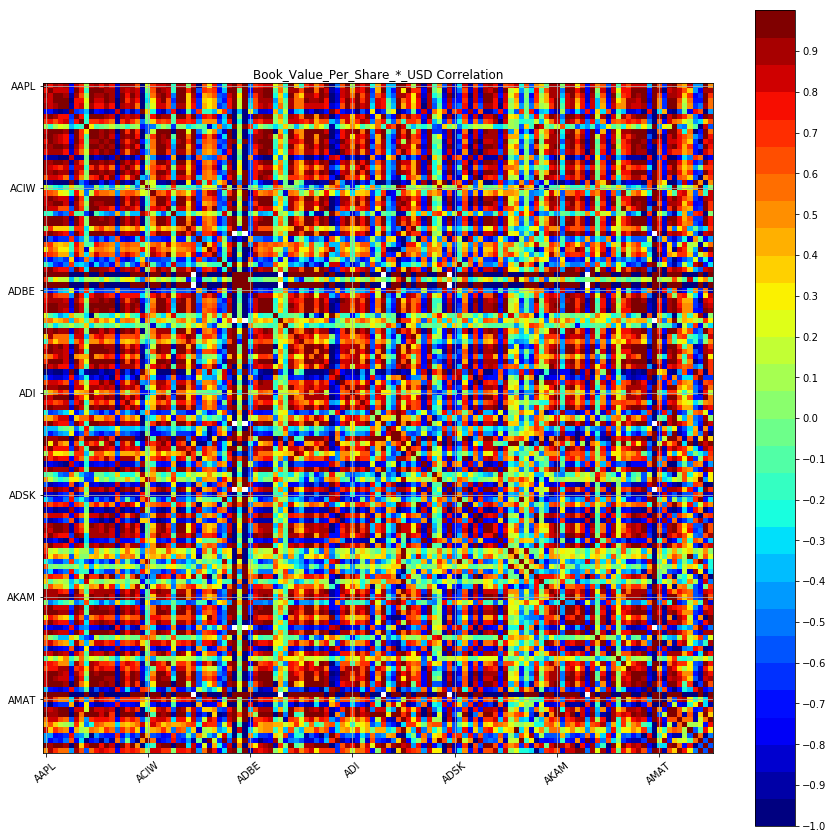

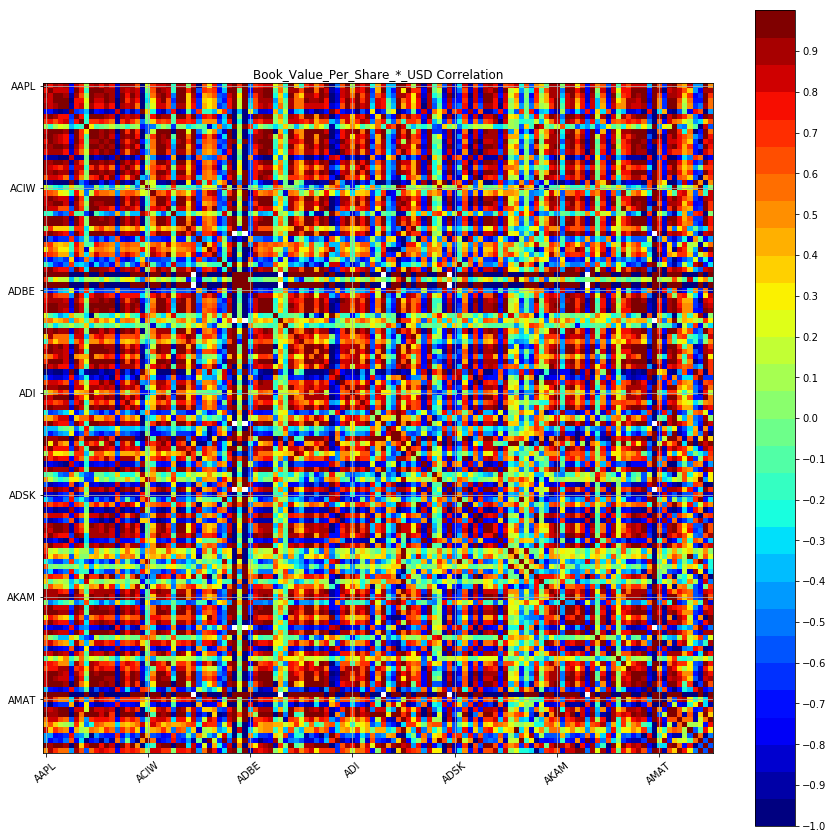

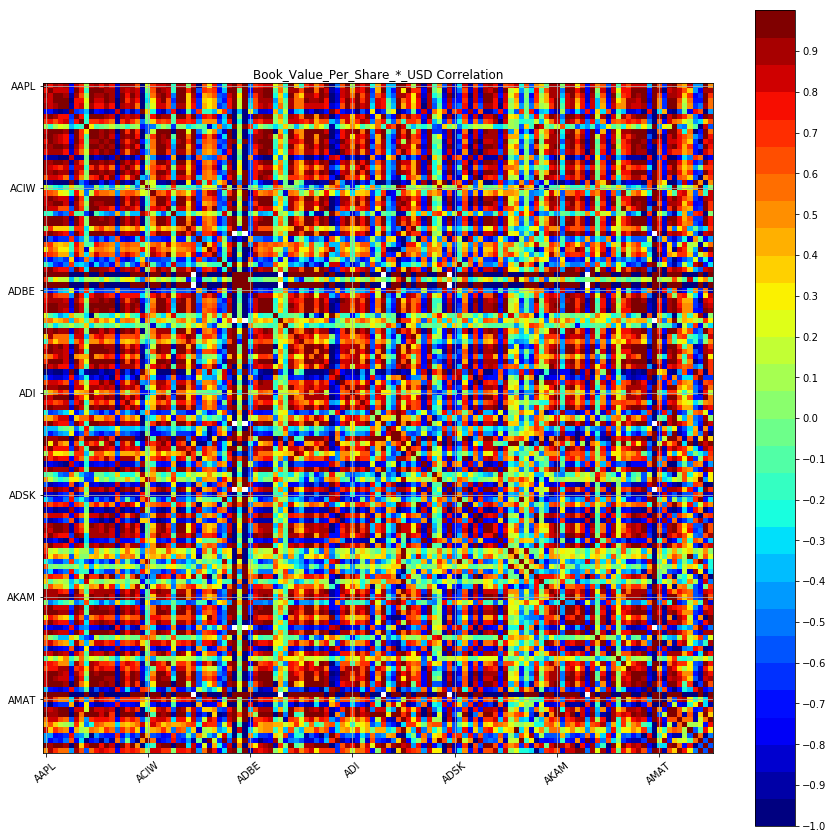

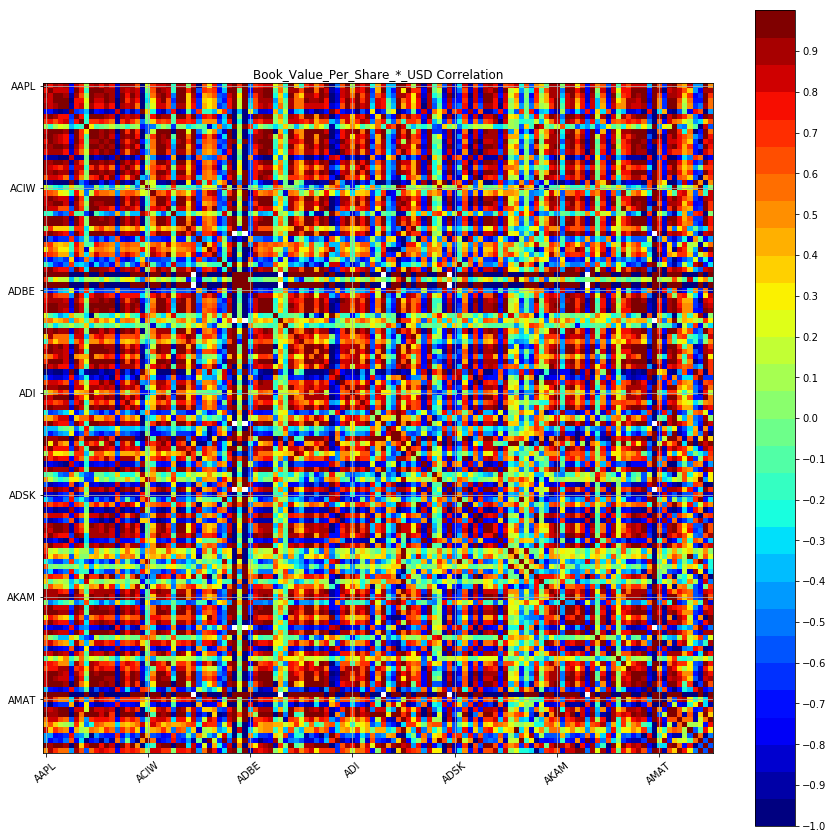

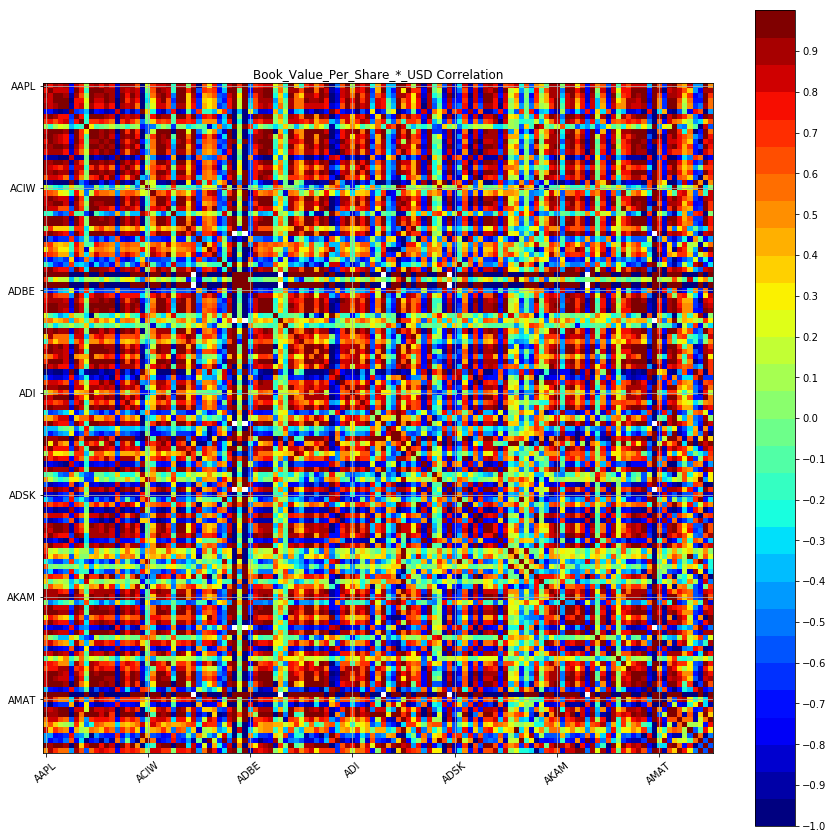

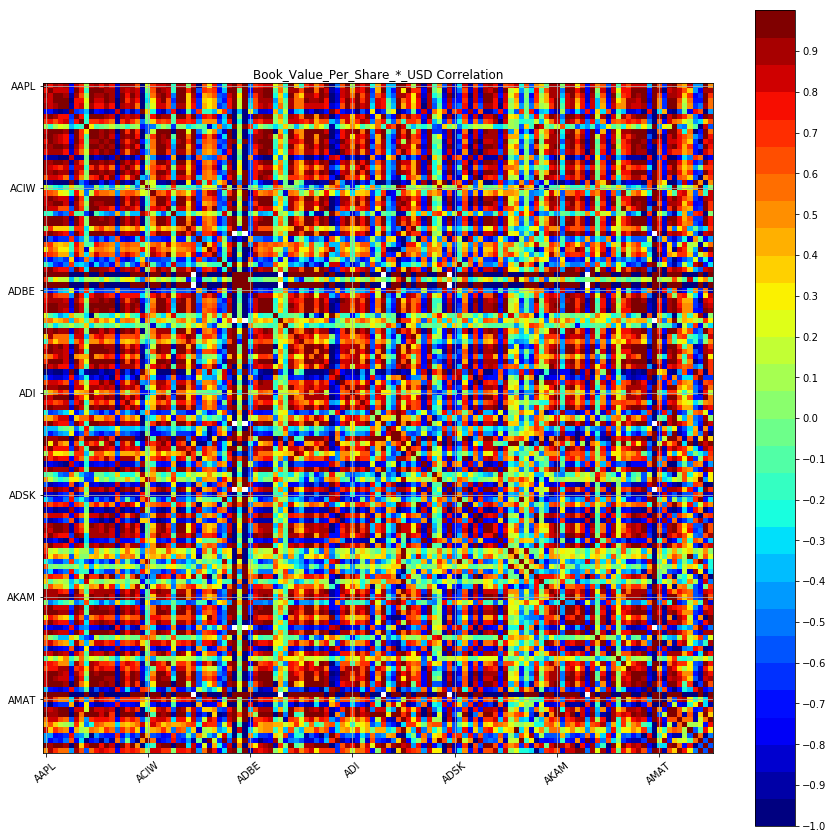

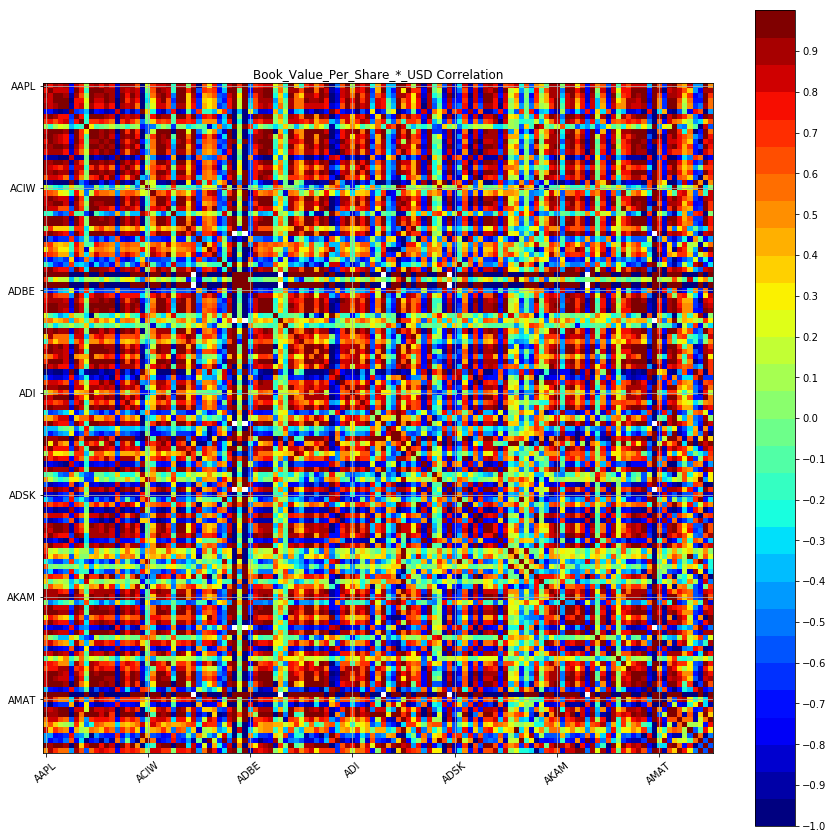

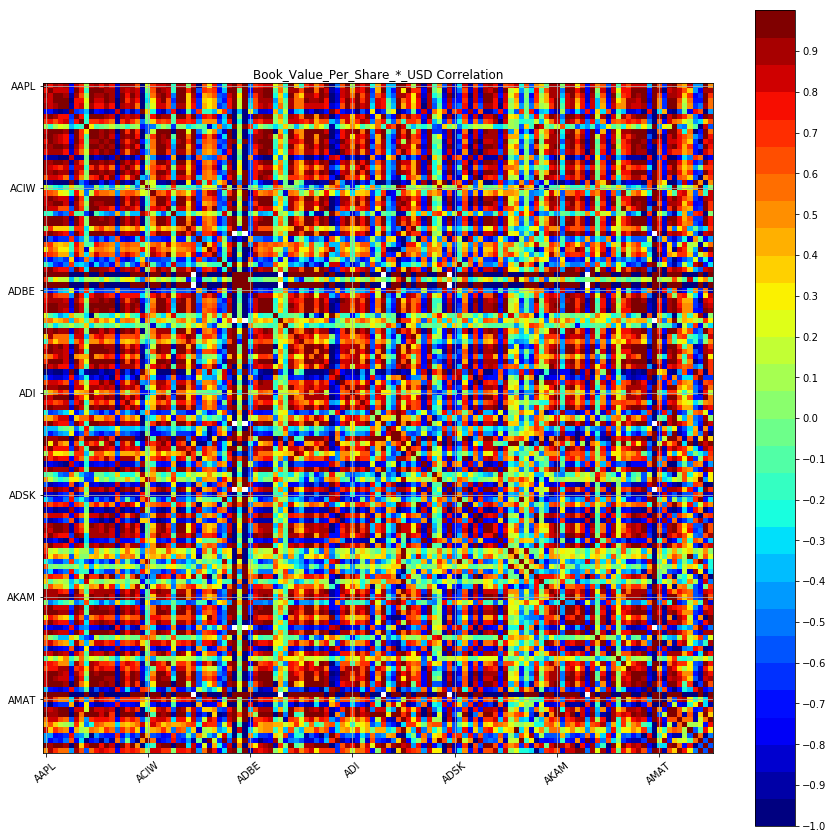

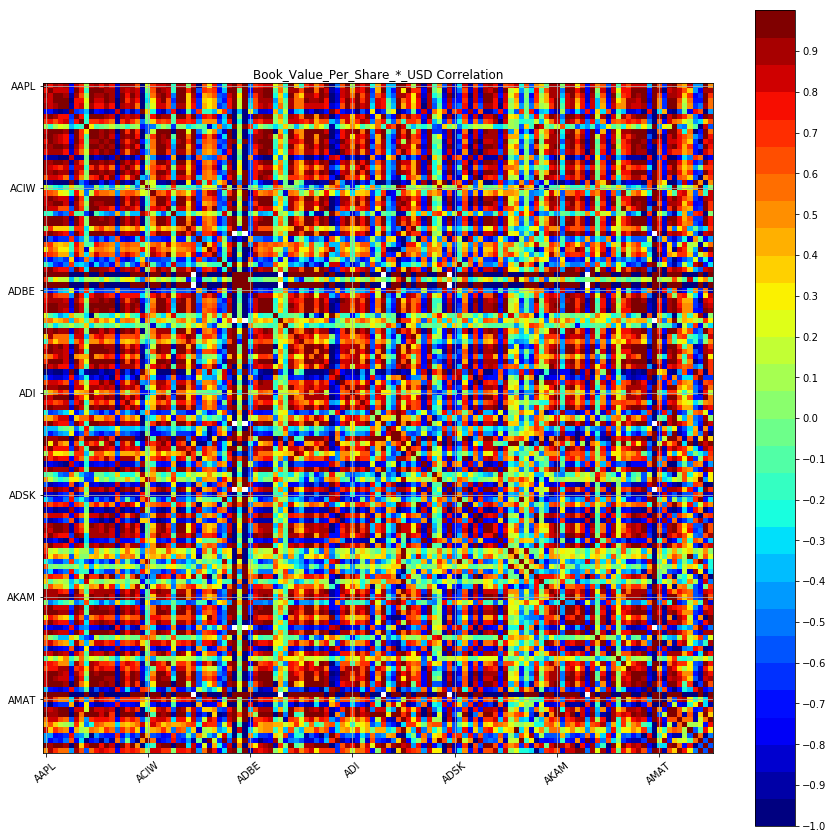

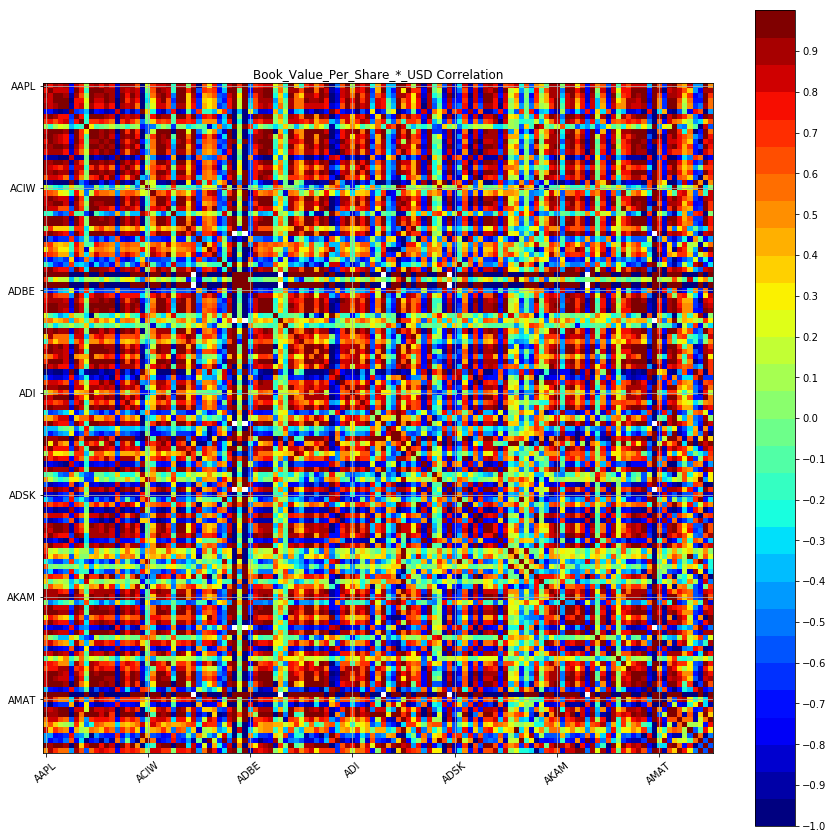

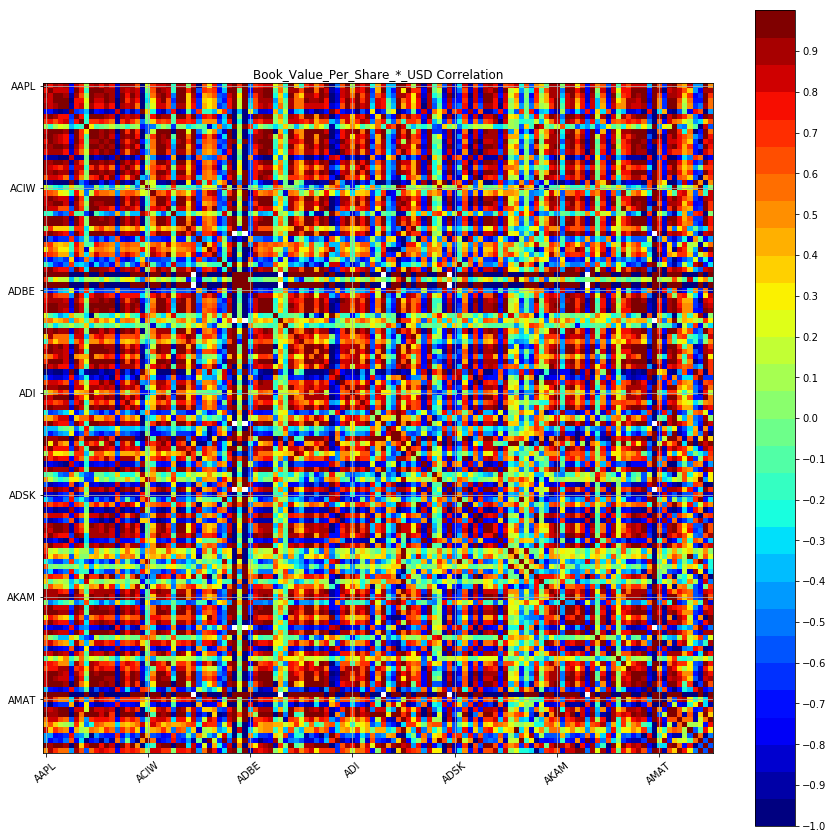

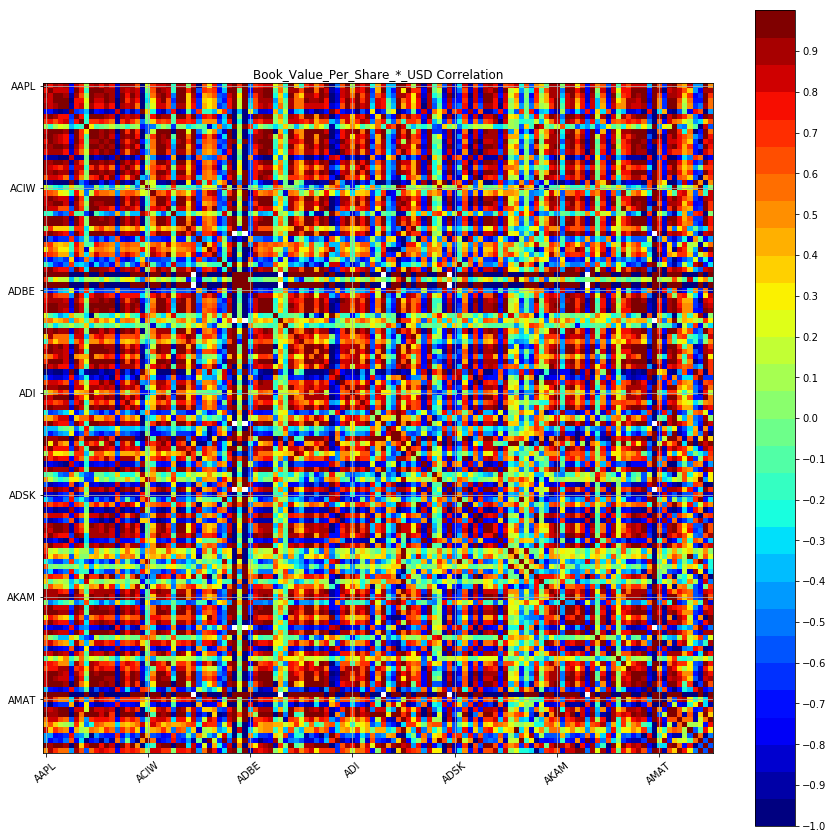

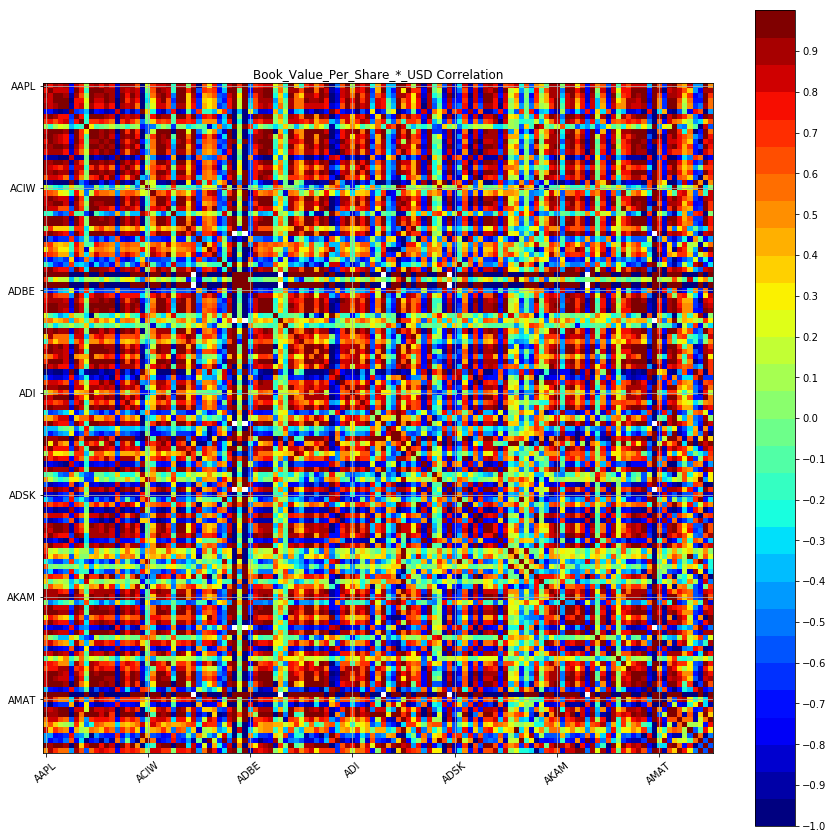

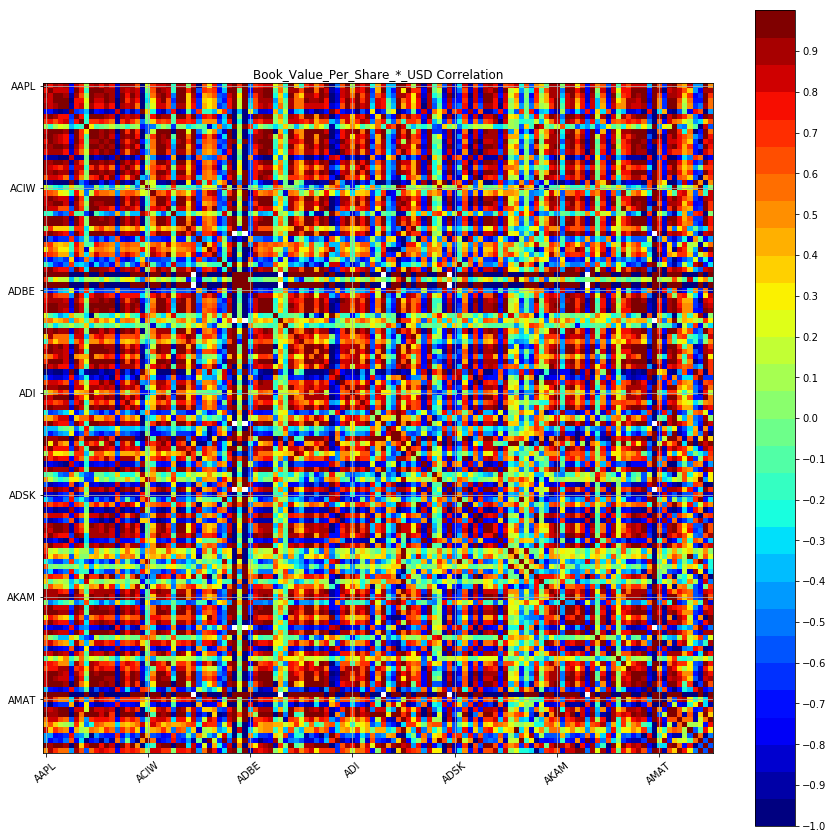

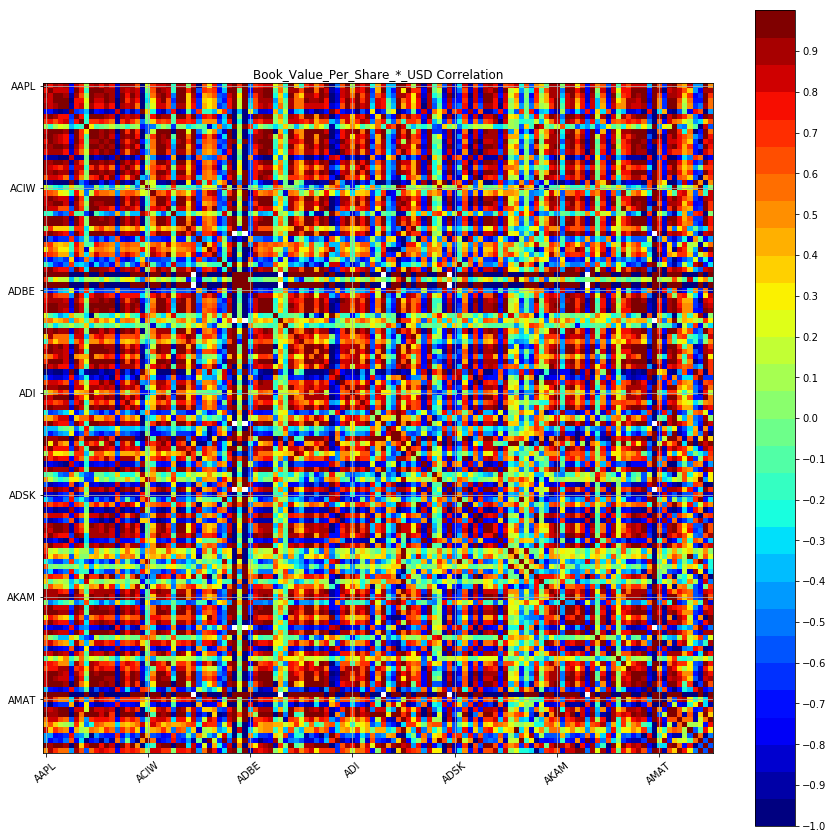

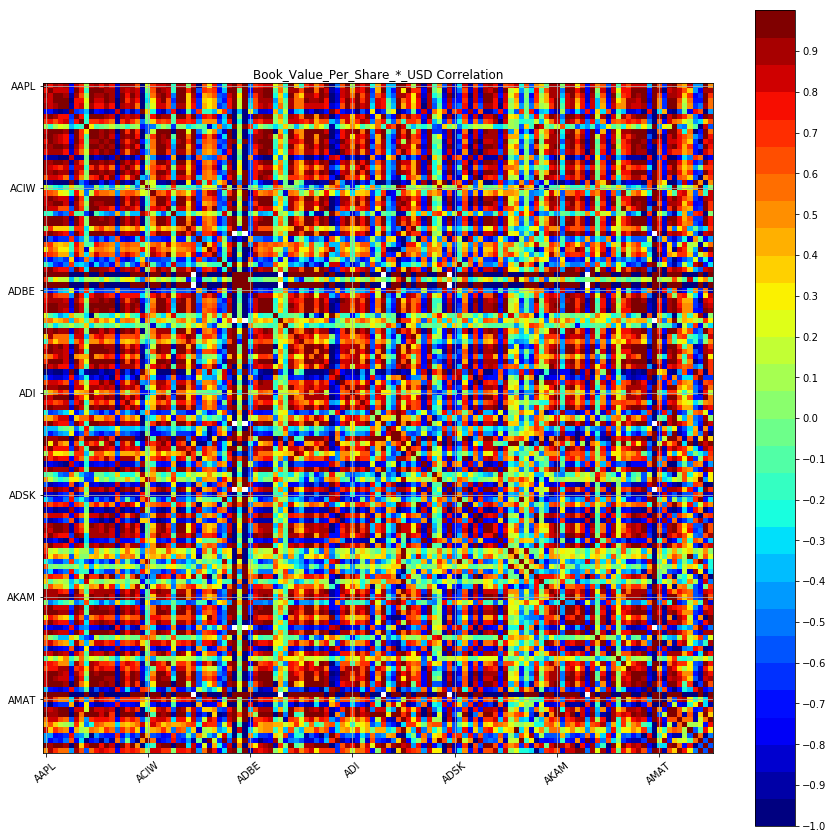

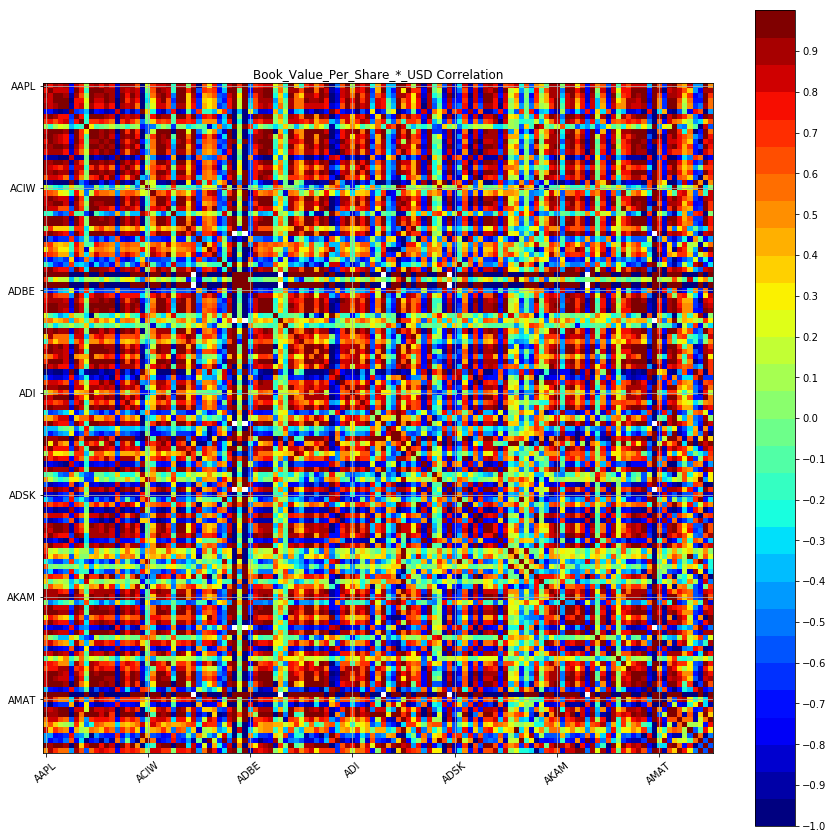

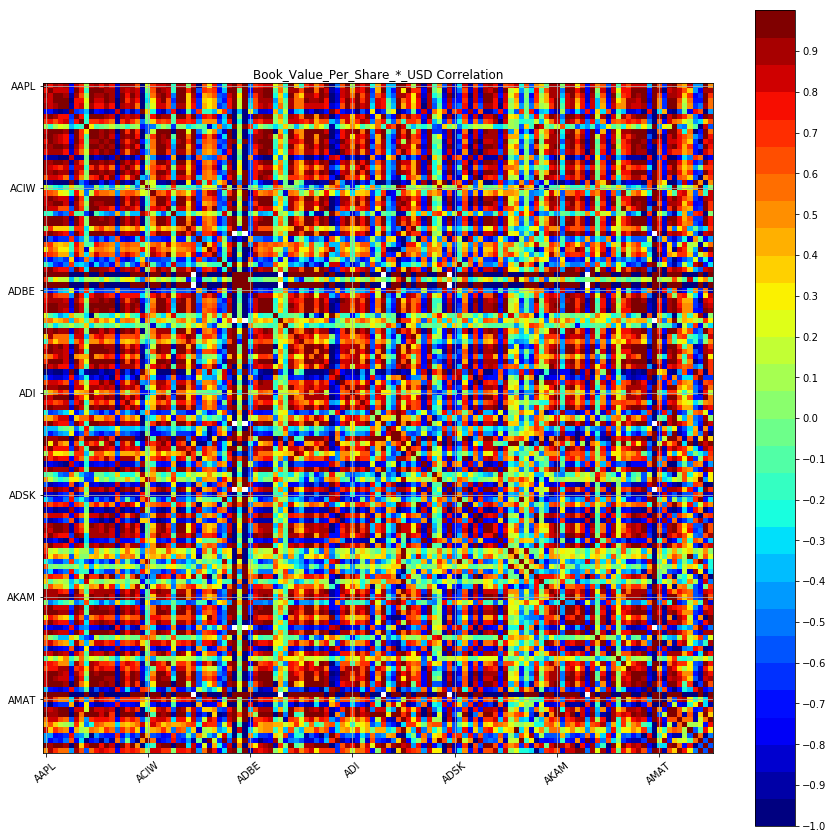

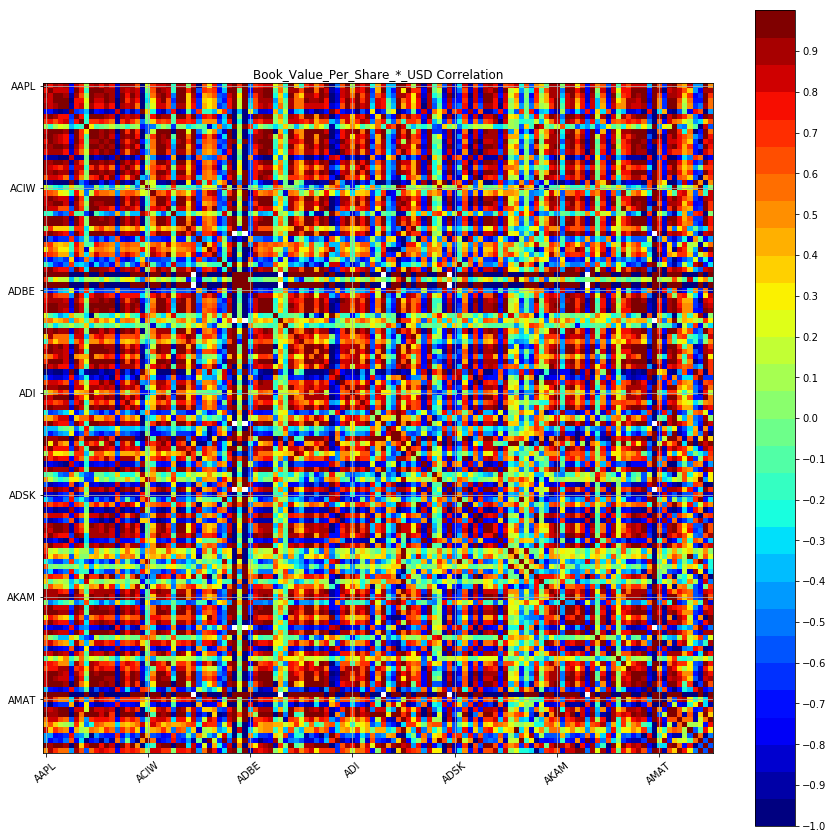

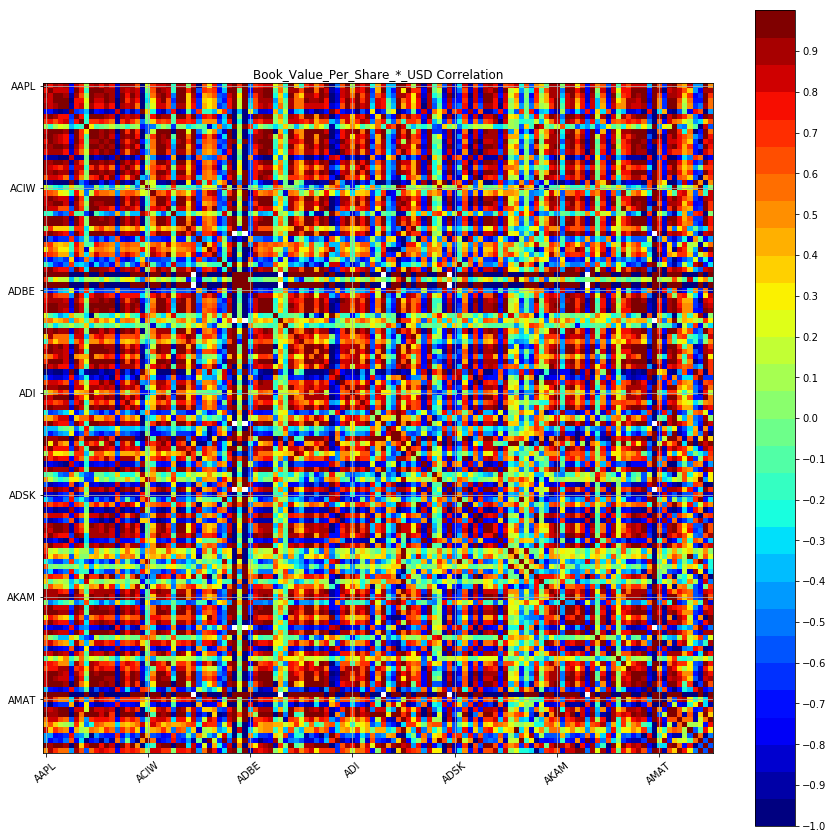

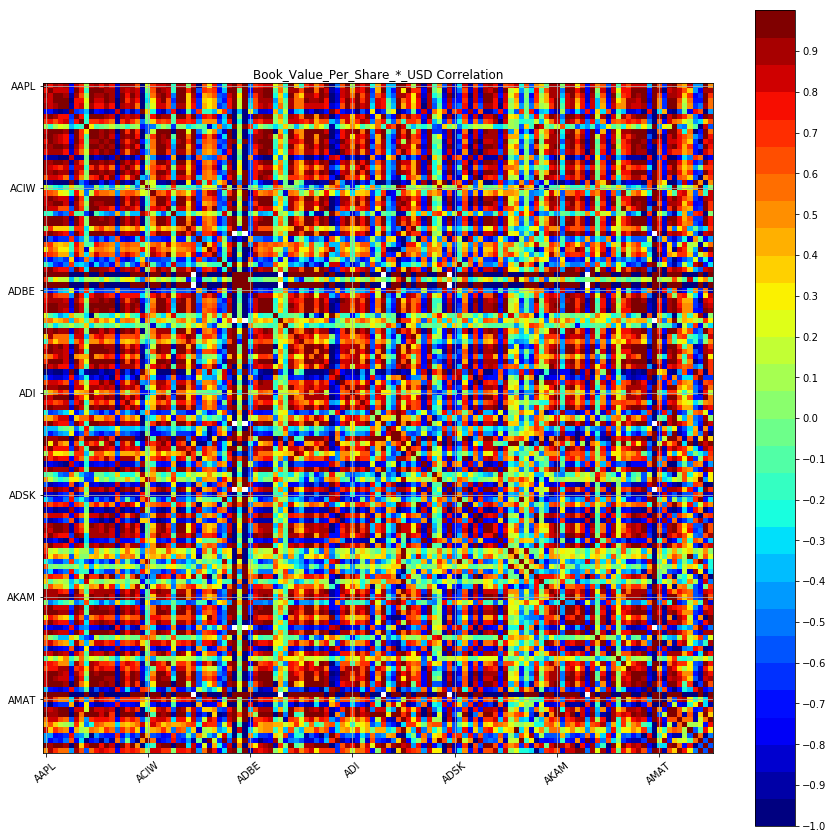

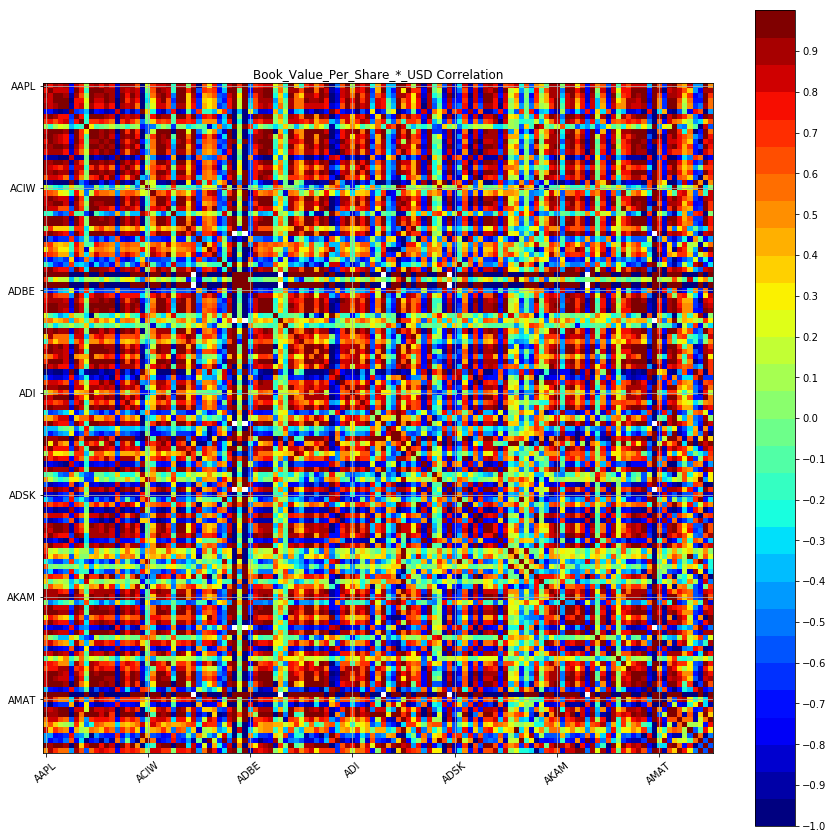

KeyboardInterrupt: 

In [14]:
def correlation_matrix(df,title):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    labels = df.columns
    ax1.grid(True)
    plt.title(title +' Correlation')
    ax1.set_xticklabels(labels,fontsize=10, rotation=40)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    #fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    fig.colorbar(cax, ticks=[i/10. for i in range(-10,11)])
    plt.show()

for data_type,ticker in pivot.columns:
    correlation_matrix(pivot.xs(data_type,level=0,axis=1),data_type)
    break